# Logistical Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [2]:
data= pd.read_csv('cleaned-movie-dataset.csv')
data

,Unnamed: 0,Title,Genres,Cast,Budget,Revenue,Popularity,Vote_average,Release_decade
0,0,The Theory of Everything,"['Drama', 'Romance']","['Eddie Redmayne', 'Felicity Jones', 'Charlie ...",15000000,123726688,22.120,7.864,2010s
1,1,Die Hard,"['Action', 'Thriller']","['Bruce Willis', 'Alan Rickman', 'Alexander Go...",28000000,140767956,52.121,7.764,1980s
2,2,Home Alone,"['Comedy', 'Family']","['Macaulay Culkin', 'Joe Pesci', 'Daniel Stern...",18000000,476684675,2.289,7.404,1990s
3,3,Madagascar,"['Family', 'Animation', 'Adventure', 'Comedy']","['Ben Stiller', 'Chris Rock', 'David Schwimmer...",75000000,542063846,93.185,6.884,2000s
4,4,Minions,"['Family', 'Animation', 'Adventure', 'Comedy']","['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...",74000000,1156730962,33.933,6.394,2010s
...,...,...,...,...,...,...,...,...,...
361,361,Mission: Impossible - Rogue Nation,"['Action', 'Adventure']","['Tom Cruise', 'Jeremy Renner', 'Simon Pegg', ...",150000000,682716636,45.556,7.176,2010s
362,362,The Equalizer,"['Thriller', 'Action', 'Crime']","['Denzel Washington', 'Marton Csokas', 'Chloë ...",55000000,192330738,57.464,7.236,2010s
363,363,Annihilation,"['Science Fiction', 'Horror']","['Natalie Portman', 'Jennifer Jason Leigh', 'G...",40000000,43070915,32.067,6.397,2010s
364,364,Minority Report,"['Action', 'Thriller', 'Science Fiction', 'Mys...","['Tom Cruise', 'Colin Farrell', 'Samantha Mort...",102000000,358372926,27.909,7.333,2000s


In [4]:
# Extract the required columns
df1 = data[['Vote_average', 'Revenue', 'Budget']]

# Drop rows with missing values
df1 = df1.dropna()
df1

,Vote_average,Revenue,Budget
0,7.864,123726688,15000000
1,7.764,140767956,28000000
2,7.404,476684675,18000000
3,6.884,542063846,75000000
4,6.394,1156730962,74000000
...,...,...,...
361,7.176,682716636,150000000
362,7.236,192330738,55000000
363,6.397,43070915,40000000
364,7.333,358372926,102000000


In [53]:
# Define the input variables
X = df1[['Vote_average']] # select the feature variable
y = (np.where(df1['Revenue']>=3.9*df1['Budget'], 1, 0))


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16) # split the data into training and testing sets

# model building
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [55]:
# Make Prediction using the model
y_pred= logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

Accuracy: 0.6956521739130435
Confusion matrix:
 [[ 4 26]
 [ 2 60]]
True Positives: 60
True Negatives: 4
False Positives: 26
False Negatives: 2


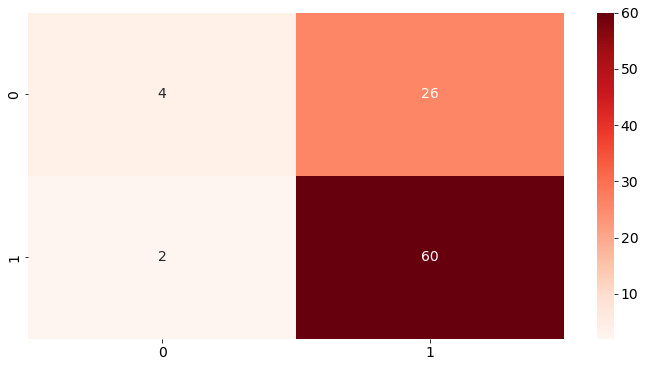

In [56]:
# Confusion Matrix and Accuracy rating
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt

print('Accuracy:', accuracy)
print('Confusion matrix:\n', cm)
# Extracting TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Printing the values of TP, TN, FP, FN
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(logreg, X, y, cv=5)

# Print the cross-validation scores, for a set of 5 arrays

print("Cross-validation scores:", scores)

Cross-validation scores: [0.68918919 0.68493151 0.63013699 0.71232877 0.69863014]


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# calculate precision
precision = precision_score(y_test, y_pred)

# calculate recall
recall = recall_score(y_test, y_pred)

# calculate F1 score

f1 = f1_score(y_test, y_pred)


print('Precision:', precision)
print('Recall', recall)
print('F1 Score:', f1)

Precision: 0.6976744186046512
Recall 0.967741935483871
F1 Score: 0.810810810810811


In [59]:
logreg.predict_proba(X_test)

array([[0.28297592, 0.71702408],
       [0.26415784, 0.73584216],
       [0.18969828, 0.81030172],
       [0.20237749, 0.79762251],
       [0.40434202, 0.59565798],
       [0.48257902, 0.51742098],
       [0.32257098, 0.67742902],
       [0.22039472, 0.77960528],
       [0.55195774, 0.44804226],
       [0.19635687, 0.80364313],
       [0.42324921, 0.57675079],
       [0.22140457, 0.77859543],
       [0.35946515, 0.64053485],
       [0.27555268, 0.72444732],
       [0.41691889, 0.58308111],
       [0.14351096, 0.85648904],
       [0.55092103, 0.44907897],
       [0.23634247, 0.76365753],
       [0.32238784, 0.67761216],
       [0.39850108, 0.60149892],
       [0.22039472, 0.77960528],
       [0.49849855, 0.50150145],
       [0.27521814, 0.72478186],
       [0.34379627, 0.65620373],
       [0.31456473, 0.68543527],
       [0.2931174 , 0.7068826 ],
       [0.42898871, 0.57101129],
       [0.25386266, 0.74613734],
       [0.1320644 , 0.8679356 ],
       [0.22097137, 0.77902863],
       [0.

<AxesSubplot:xlabel='Vote_average'>

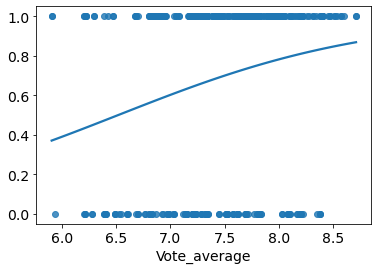

In [60]:
sb.regplot(x=X, y=y, data=df1, logistic=True, ci=None)

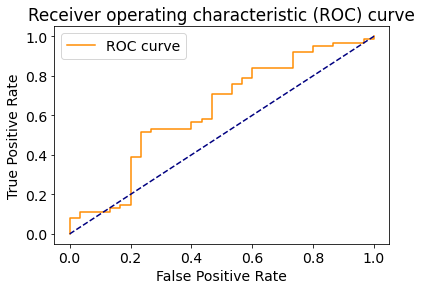

In [61]:
# Plot the ROC curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()


In [62]:
new_X = df1[['Vote_average']]

# Use your trained logistic regression model to predict the revenue
y_pred = logreg.predict(new_X)

# Save the predictions to a new column in your DataFrame
df1['Predicted Revenue'] = y_pred
df1

,Vote_average,Revenue,Budget,Predicted Revenue
0,7.864,123726688,15000000,1
1,7.764,140767956,28000000,1
2,7.404,476684675,18000000,1
3,6.884,542063846,75000000,1
4,6.394,1156730962,74000000,0
...,...,...,...,...
361,7.176,682716636,150000000,1
362,7.236,192330738,55000000,1
363,6.397,43070915,40000000,0
364,7.333,358372926,102000000,1


In [63]:
count_ones = np.count_nonzero(y_pred == 1)
print("Number of occurrences of 1 in predicted revenue:", count_ones)
rate= count_ones/366
print("Percentage of movies that have made a profit: " , rate*100)

Number of occurrences of 1 in predicted revenue: 341
Percentage of movies that have made a profit:  93.16939890710383
